1.Price: The price of the house.

2.Area: The total area of the house in square feet.

3.Bedrooms: The number of bedrooms in the house.

4.Bathrooms: The number of bathrooms in the house.

5.Stories: The number of stories in the house.

6.Mainroad: Whether the house is connected to the main road (Yes/No).

7.Guestroom: Whether the house has a guest room (Yes/No).

8.Basement: Whether the house has a basement (Yes/No).

9.Hot water heating: Whether the house has a hot water heating system (Yes/No).

10.Airconditioning: Whether the house has an air conditioning system (Yes/No).

11.Parking: The number of parking spaces available within the house.

12.Prefarea: Whether the house is located in a preferred area (Yes/No).

13.Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Importing and Analyzing Data

In [2]:
df=pd.read_csv("datasets/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### Verify if in dataset are some null values or dublicates 
If True:

        clean_data()

else:

        continue()


In [4]:
df.isna().sum()



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print(df["price"].max())
print(df["price"].min())

13300000
1750000


In [7]:
mean_point=df["price"].mean()
print(mean_point)

4766729.247706422


In [8]:
def plot_price_distribution(df, price_column="price"):
    """
    Create a clear visualization of houses above and below/equal to mean price.

    Parameters:
    df (pandas.DataFrame): DataFrame containing house data
    price_column (str): Name of the column containing price data
    """

    mean_price = df[price_column].mean()

    above_mean = (df[price_column] > mean_price).sum()
    below_or_equal_mean = (df[price_column] <= mean_price).sum()

    total = len(df)
    above_percent = (above_mean / total) * 100
    below_percent = (below_or_equal_mean / total) * 100

    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        ["Below or equal mean", "Above mean"],
        [below_or_equal_mean, above_mean],
        color=["lightblue", "darkblue"],
    )

    plt.title("House distribution by price", fontsize=14, pad=20)
    plt.ylabel("Number of Houses", fontsize=12)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}\n({height/total*100:.1f}%)",
            ha="center",
            va="bottom",
        )
        
    plt.figtext(0.02, -0.1, f"Mean Price: ${mean_price:,.2f}", ha="left", fontsize=10)

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

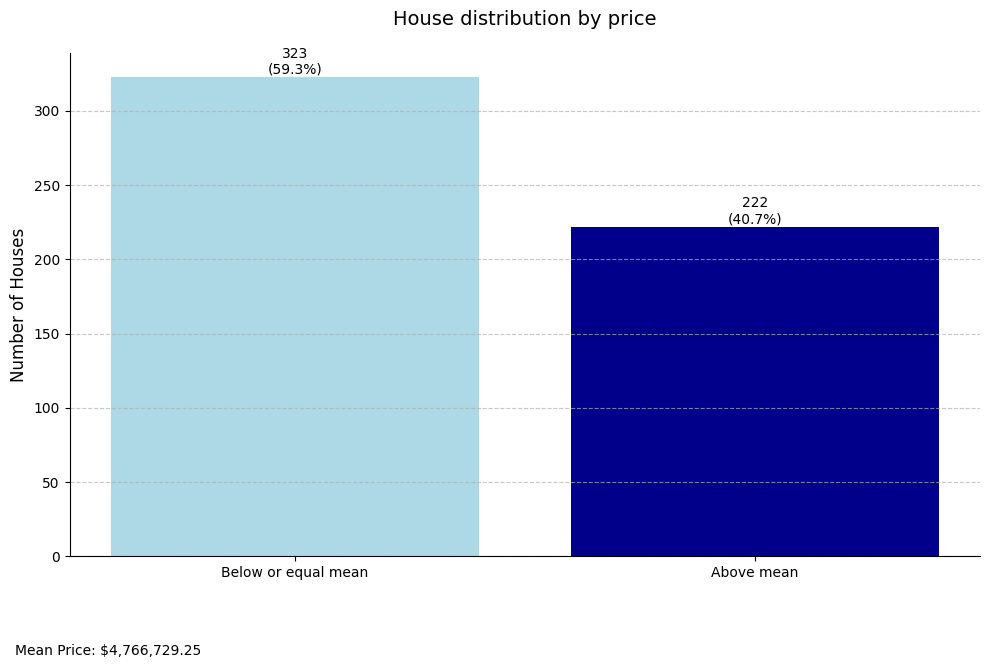

In [9]:
plot_price_distribution(df, price_column="price")

In [10]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [11]:
# Selectăm doar coloanele numerice pentru analiză
def handle_outliers(df):
    """
    Handles outliers in the dataset by capping predictor variables while preserving
    the target variable (price).
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_processed = df.copy()

    # Define predictor columns that need outlier handling
    predictor_columns = ["area", "bedrooms", "bathrooms"]

    # Process each predictor column
    for column in predictor_columns:
        # Calculate boundaries
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values at the boundaries
        df_processed[column] = df_processed[column].clip(
            lower=lower_bound, upper=upper_bound
        )

        # Print summary of changes
        original_outliers = len(
            df[df[column].between(lower_bound, upper_bound) == False]
        )
        print(f"\nProcessing {column}:")
        print(f"Original range: [{df[column].min():.2f}, {df[column].max():.2f}]")
        print(
            f"New range: [{df_processed[column].min():.2f}, {df_processed[column].max():.2f}]"
        )
        print(f"Number of values adjusted: {original_outliers}")

    return df_processed


# Apply the outlier handling
df_no_outliers = handle_outliers(df)


Processing area:
Original range: [1650.00, 16200.00]
New range: [1650.00, 10500.00]
Number of values adjusted: 12

Processing bedrooms:
Original range: [1.00, 6.00]
New range: [1.00, 4.50]
Number of values adjusted: 12

Processing bathrooms:
Original range: [1.00, 4.00]
New range: [1.00, 3.50]
Number of values adjusted: 1


### Data Preprocessing:Convert string columns to numbers

#### Transform string columns yes/no to numeric

In [12]:
yes_no_columns = [
    col
    for col in df_no_outliers.columns
    if df_no_outliers[col].nunique() == 2 and set(df_no_outliers[col].unique()) == {"yes", "no"}
]

print("yes/no columns are:")

print(yes_no_columns)

yes/no columns are:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [13]:
for col in yes_no_columns:
    df_no_outliers[col] = df_no_outliers[col].map({"yes": 1, "no": 0})

In [14]:
le = LabelEncoder()
df_no_outliers["furnishingstatus"] = le.fit_transform(df_no_outliers["furnishingstatus"])

In [15]:
print(df_no_outliers)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420       4.0        2.0        3         1          0   
1    12250000  8960       4.0        3.5        4         1          0   
2    12250000  9960       3.0        2.0        2         1          0   
3    12215000  7500       4.0        2.0        2         1          0   
4    11410000  7420       4.0        1.0        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000       2.0        1.0        1         1          0   
541   1767150  2400       3.0        1.0        1         0          0   
542   1750000  3620       2.0        1.0        1         1          0   
543   1750000  2910       3.0        1.0        1         0          0   
544   1750000  3850       3.0        1.0        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

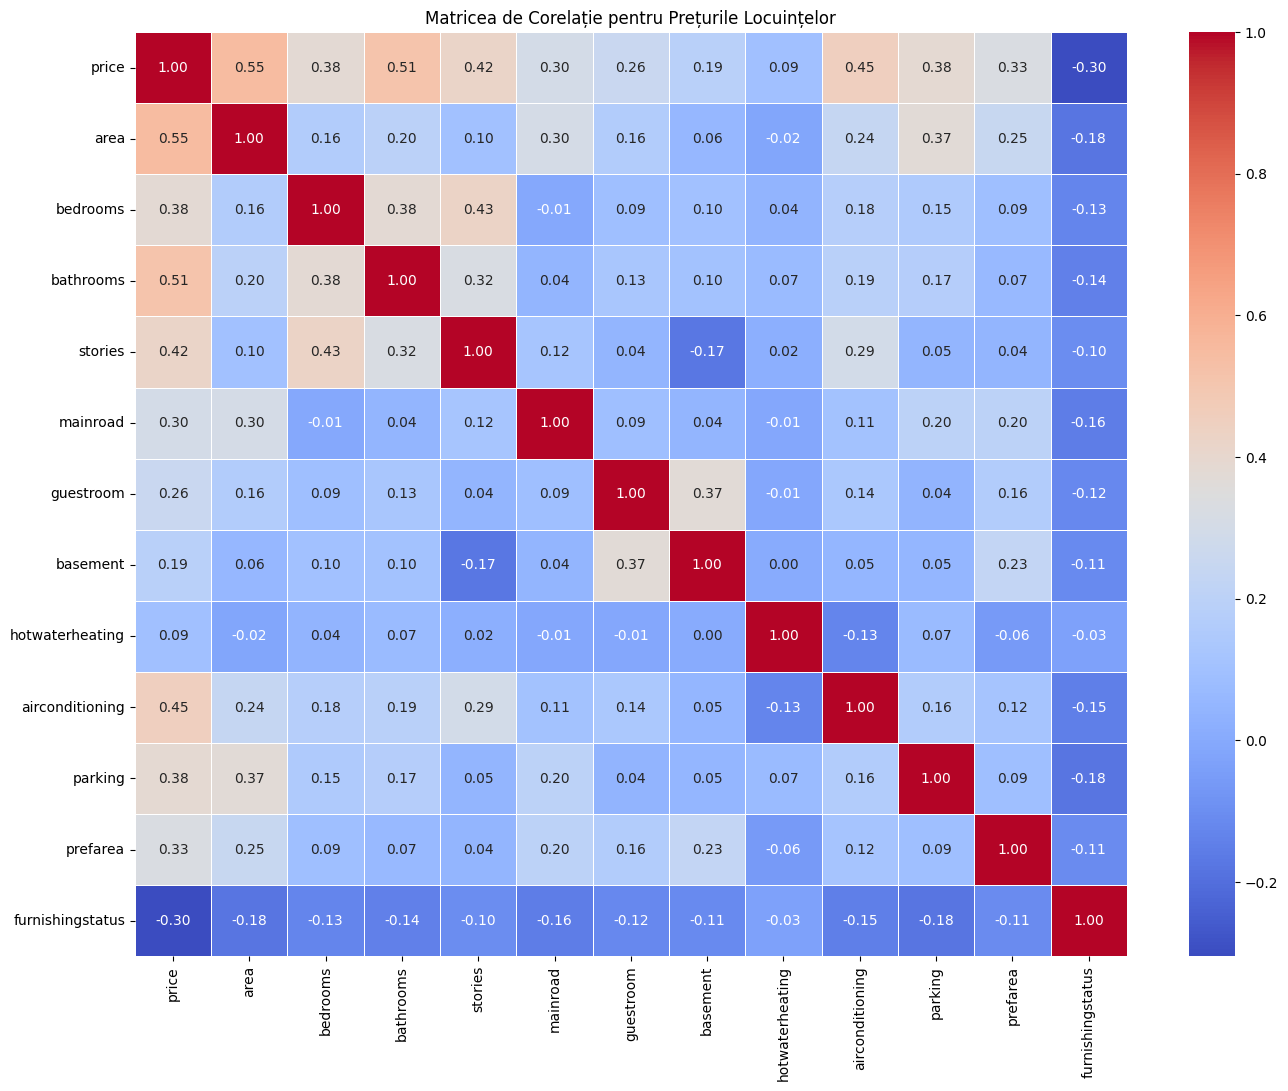

In [16]:
numeric_df = df_no_outliers.select_dtypes(include=["number"])

# Calcularea matricei de corelație
corr_matrix = numeric_df.corr()

# Vizualizarea matricei de corelație cu Seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matricea de Corelație pentru Prețurile Locuințelor")
plt.show()

In [17]:
correlation_with_target = corr_matrix["price"].sort_values(ascending=False)
print("Corelațiile cu 'price':")
print(correlation_with_target)

Corelațiile cu 'price':
price               1.000000
area                0.549576
bathrooms           0.514867
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.380282
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


### Key features for high rate of prediction

In [18]:
key_features = ["area", "bathrooms", "airconditioning", "stories", "parking", "bedrooms"]
X = df_no_outliers[key_features]
scaler=StandardScaler()

# Apoi aplicăm scalarea
X_scaled = scaler.fit_transform(X)
y = df_no_outliers["price"]

In [19]:
X_scaled

array([[ 1.15658327,  1.4365849 ,  1.4726183 ,  1.37821692,  1.51769249,
         1.50609257],
       [ 1.92506041,  4.45175346,  1.4726183 ,  2.53202371,  2.67940935,
         1.50609257],
       [ 2.42407154,  1.4365849 , -0.67906259,  0.22441013,  1.51769249,
         0.07109178],
       ...,
       [-0.73965902, -0.57352748, -0.67906259, -0.92939666, -0.80574124,
        -1.36390901],
       [-1.09395692, -0.57352748, -0.67906259, -0.92939666, -0.80574124,
         0.07109178],
       [-0.62488646, -0.57352748, -0.67906259,  0.22441013, -0.80574124,
         0.07109178]], shape=(545, 6))

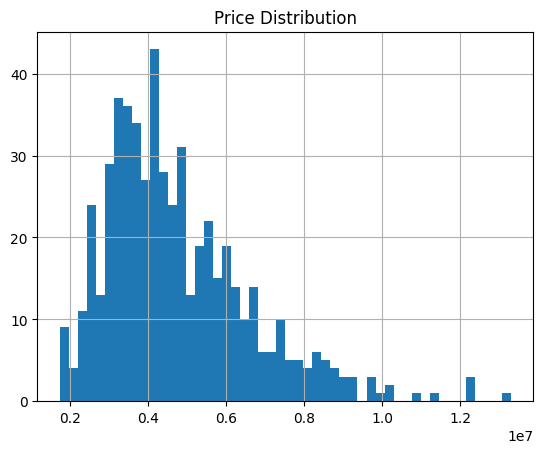

In [20]:
df_no_outliers["price"].hist(bins=50)
plt.title("Price Distribution")
plt.show()